In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification


In [36]:
"""import the dataset in data library"""

data = pd.read_csv("fraud_call.file",sep='\t',names=['label','content'])
data.head(10)

,label,content
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
5,normal,Got it. Seventeen pounds for seven hundred ml ...
6,normal,Me and him so funny...
7,normal,"Sweetheart, hope you are not having that kind ..."
8,normal,When you login date time... Dad fetching you h...
9,normal,"What will we do in the shower, baby?"


In [37]:
data['label'].value_counts()

normal    5287
fraud      638
Name: label, dtype: int64

/home/felipe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

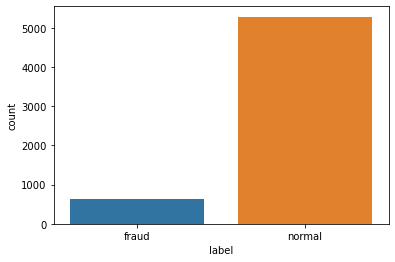

In [38]:
sns.countplot('label',data=data)

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.9723253459331759


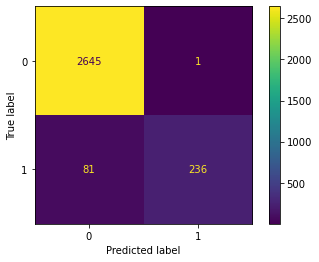

In [39]:
# load data
data = pd.read_csv("fraud_call.file",sep='\t',names=['label','content'])

# preprocess data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['content'])
y = data['label'].apply(lambda x: 1 if x == 'fraud' else 0)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions on test set
y_pred = clf.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()


In [40]:
# predict new text
new_text = "Hello, this is John from the bank. We have detected some unusual activity on your account."
new_text_vec = vectorizer.transform([new_text])
prediction = clf.predict(new_text_vec)[0]

# print result
if prediction == 1:
    print("Fraud")
else:
    print("Normal")

Fraud


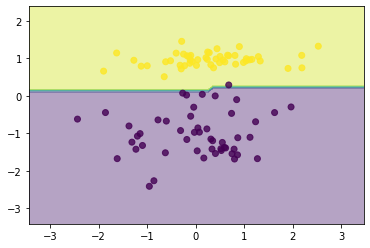

In [41]:
# generate 2D dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=1)

# reset the training for the whole dataset
clf = LogisticRegression()
clf.fit(X, y)

# plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()


/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


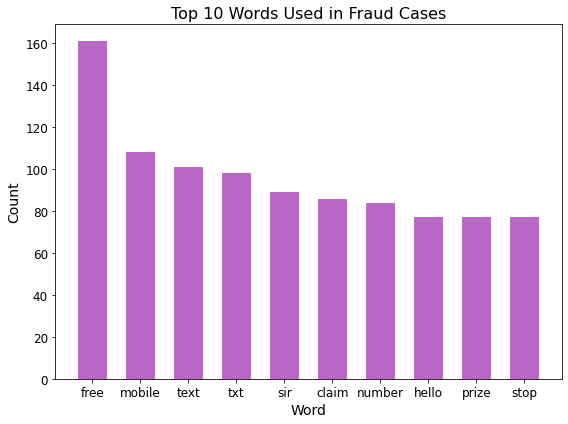

In [42]:
# reset the default X and y values
X = vectorizer.fit_transform(data['content'])
y = data['label'].apply(lambda x: 1 if x == 'fraud' else 0)

# get word counts for fraud cases
fraud_counts = X[y == 1].sum(axis=0)

# convert to array and get word names
fraud_counts_arr = fraud_counts.A1
word_names = vectorizer.get_feature_names()

# create dictionary of word counts and names
word_dict = dict(zip(word_names, fraud_counts_arr))

# get top 5 most used words
top_words = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(8,6)) # increase figure size
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], width=0.6, color='#BA68C8') # modify color
plt.title("Top 10 Words Used in Fraud Cases", fontsize=16) # increase font size
plt.xlabel("Word", fontsize=14) # increase font size
plt.ylabel("Count", fontsize=14) # increase font size
plt.xticks(fontsize=12) # increase font size
plt.yticks(fontsize=12) # increase font size
plt.tight_layout() # adjust spacing between columns
plt.show()
